In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/philhoonoh/os/blob/main/lecture_summary/05_Chapter5.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Chapter 5. Scheduling
#### Contents
    - 5.1 Basic Concepts
    - 5.2 Scheduling Criteria
    - 5.3 Scheduling Algorithms
    - 5.4 Thread Scheduling
    - 5.6 Real-Time CPU Scheduling

# 5.1 Basic Concepts

### CPU scheduling 

- multiprogrammed OS 에서의 기본
- multiprogramming (multi-tasking) 의 목적
    - Maximize CPU utilization (multiprogramming)
    - Concurrency (multi-tasking)
- 여러 process를 concurrent 하게 돌리려면, os 는 어떤 process 를 다음에 돌리지를 정해야 함 
- _강의에서 multi-programming/multi-tasking/multi-processing 혼용해서 사용_


- the basis of multiprogrammed operating systems
- The objective of multiprogramming is
    - to have some processes running at all times
    - to maximize CPU utilization.
- If several processes are ready to run at the same time, the system must choose which process will run next

#### Figure 5.1 Alternating   
    - CPU Burst -> Process running
    - I/O Burst -> Process Waiting/Ready
    - CPU Bound Process : CPU Burst 가 큰 process 
    - I/O Bound Process : I/O Burst 가 큰 process   


#### Figure 5.1 Histogram  
    - CPU burst 이 큰 프로세스는 몇개 안됨  
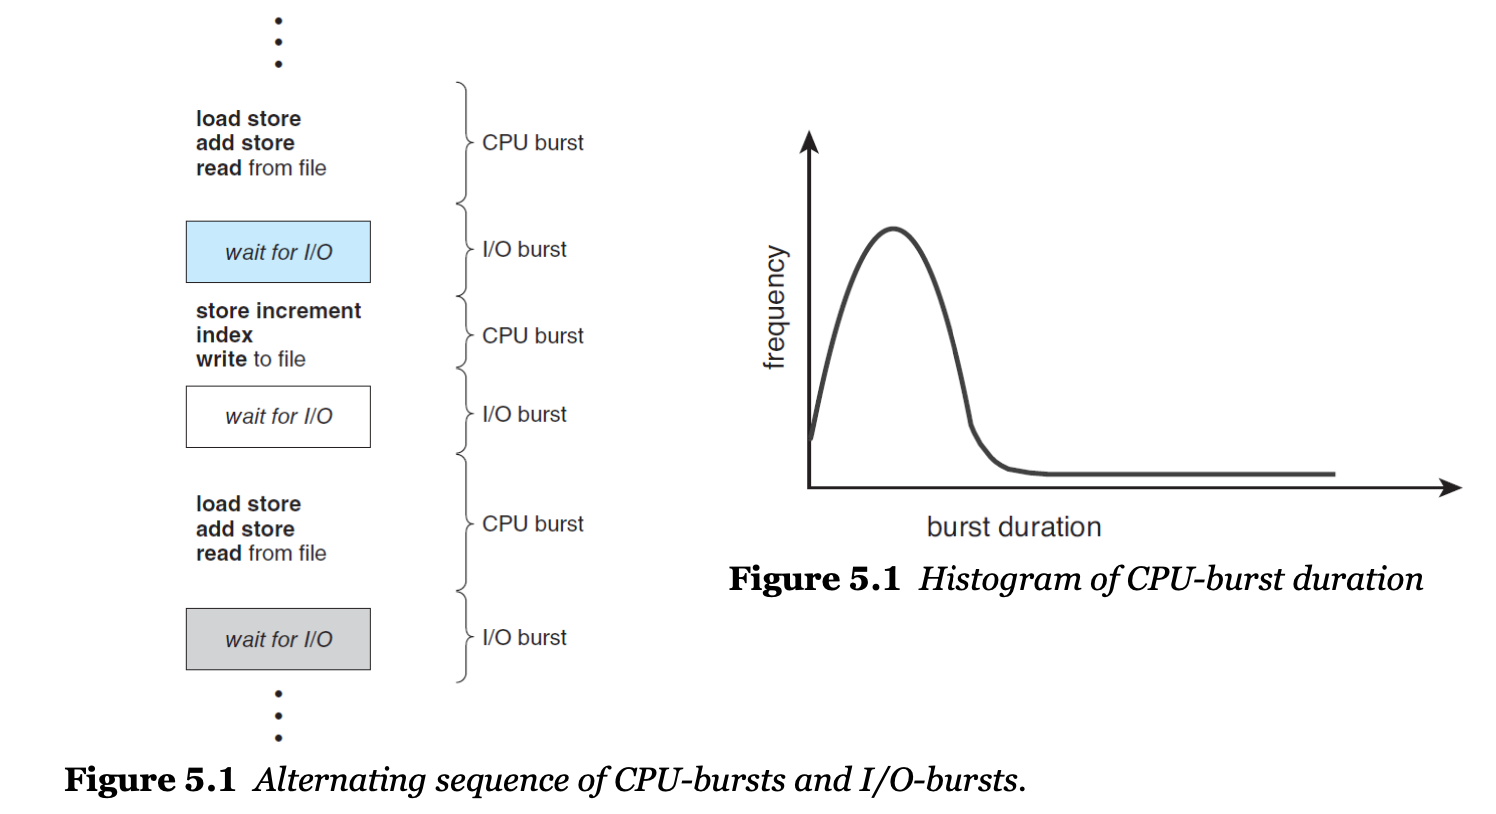

### CPU scheduler

- Ready 상태의 프로세스를 선택하여 CPU 를 할당 
- 어떤 기준으로 다음 프로세스를 선택?
    - Ready Queue 는 linked list 또는 binary tree 로 구현 가능 
    - __FIFQ  Queue__ : first in first out -> 효율적이 지 않음...
    - __Priority Queue__ -> 이 경우 프로세스의 우선순위를 어떻게 결정? 
    
    

- selects a process from the processes in memory
    - that are ready to execute and allocates the CPU to that process.
- Then, how can we select a next process?
    - Linked List? or Binary Tree?
    - FIFOQueue:First-In,First-Out
    - Priority Queue: How can we determine the priority of a process?

### __Preemptive__ vs __Nonpreemptive__

- __Nonpreemptive__ scheudling (비선점형) 
    - 프로세스가 CPU 를 release 할때까지 기다려야됨 
    - 프로세스가 CPU 를 release 하는 경우
        - 프로세스 Terminate  
        - 프로세스 Wait  
        

- __Preemptive__ scheudling (선점형) 
    - 프로세스가 scheduler 에 의해 preempted(선점)될 수 있음
    - Google Colab

### Decision Making for CPU-scheduling 

#### CPU scheduling 경우 의 수 
    1. 프로세스가 running -> waiting
    2. 프로세스가 running -> ready
    3. 프로세스가 waiting -> ready
    4. 프로세스가 terminate
    => 1, 4 의 경우 scheduling 관점에서 choice 가 없음 
    
    
##### nonpreemptive 의 경우 
    - 1, 4 의 경우 밖에 없는 경우 -> nonpreemptive
    - 1, 4 자발적 
    - 효율적이지 못하다. 

##### preemptive 의 경우 
    - 1, 4 에 더해 2, 3 의 경우가 발생 -> preemptive
    - 2, 3 은 비자발적 
    - preemptive 의 경우 선택권이 넓다. 

1. When a process switches from the running to waiting state.
2. When a process switches from the running to ready state.
3. When a process switches from the waiting to ready state.
4. When a process terminates.
• No. 1 & 4: no choice – non-preemptive.
• No. 2 & 3: choices – preemptive or non-preemptive.

### __dispatcher__

- CPU scheduler 에 의해 선택된 프로세스에게 CPU core 를 주는 것
- __Context Switch를 해주는 모듈__ 
- dispatcher 기능
    - Context Switching
    - 유저 모드롤 바꾸기
    - 유저 프로그램의 적절한 위치에서 재개 
    
- __next process 선택은 scheduler__ , __실제 switching은 dispatch__
        
--------
- a module that gives control of the CPU’s core
    - to the process selected by the CPU scheduler.
- The functions of dispatcher:
    - switching context from one process to another
    - switching to user mode
    - jumping to the proper location to resume the user program

- dispatcher 는 매우 빠르게 해야됨 
    - context switch (overhead) 줄여야됨
- dispatcher latency
    - 하나의 프로세스를 중지시키고 다른 프로세스를 실행시키는데 걸리는 시간 

--------
- The dispatcher should be as fast as possible 
    - since it is invoked during every context switch.
    - The dispatcher latency is
        - the time to stop one process and start another running.
        
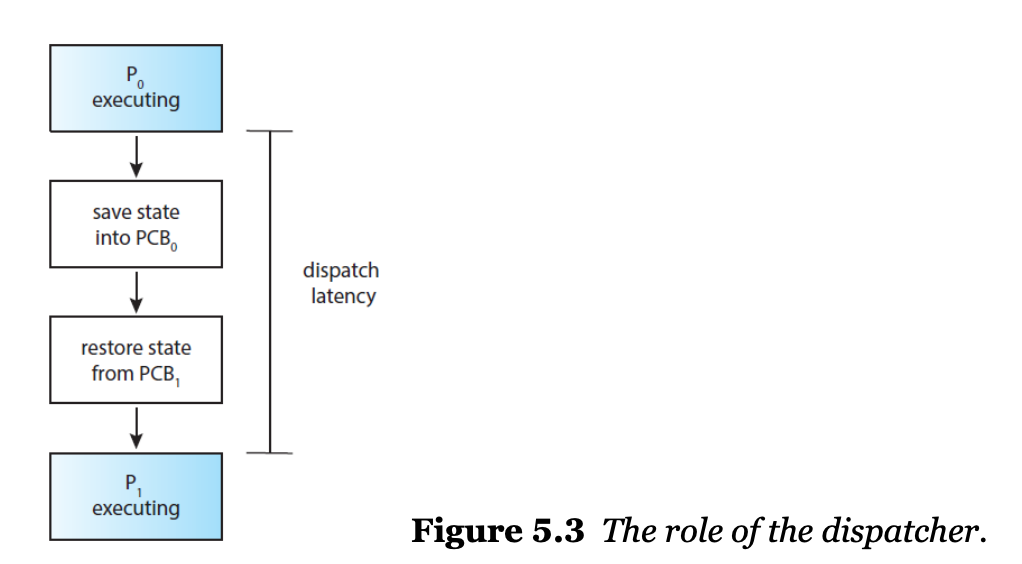

- 실제 context switches 가 얼머나 일어날까? 

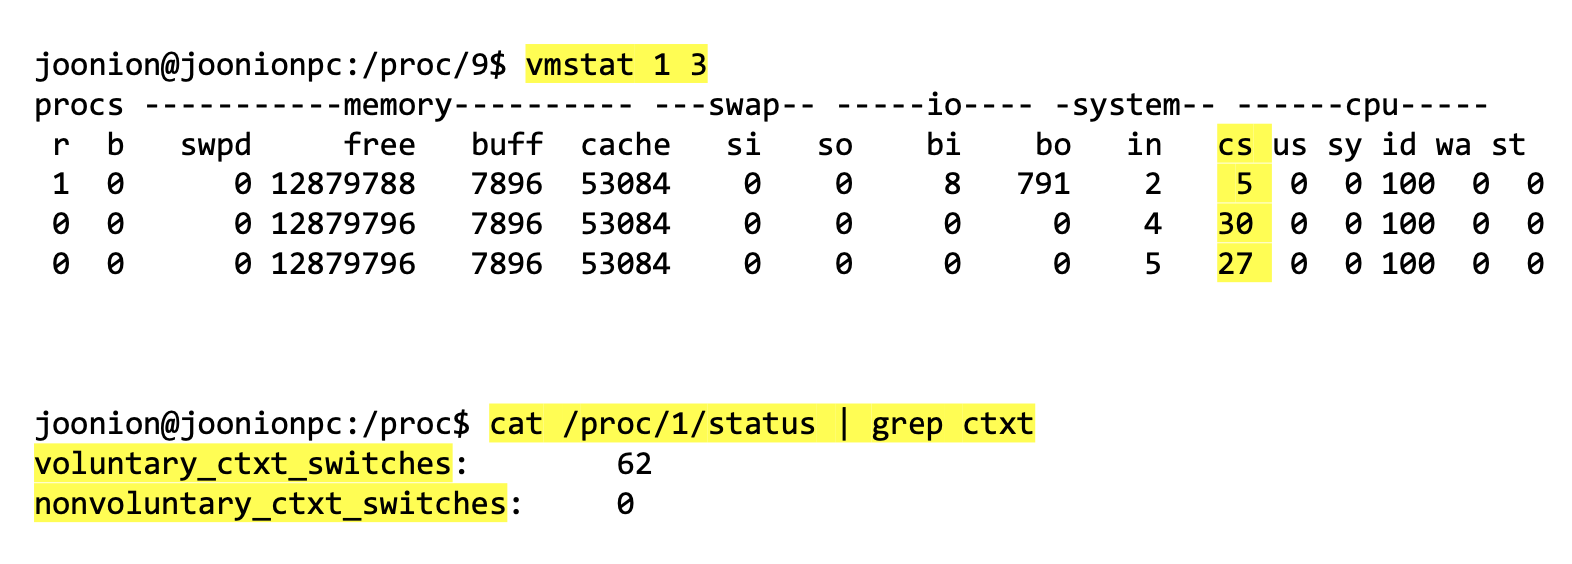

# 5.2 Scheduling Criteria

- CPU 사용률 (CPU utilization)
    - CPU utilization can range from 0 to 100 percent
- 처리량 (Throughput)
    - 주어진 단위 시간당 완료 프로세스 개수 
    - the number of processes that are completed per time unit
- 반환시간(__Turnaround time__)
    - 완료 시점 - 제출 시점 
    - The interval from the time of submission of a process to the time of completion is the turnaround time
- 대기시간(__Waiting time__)
    - sum of total waiting time in queue
    - Waiting time is the sum of the periods spent waiting in the ready queue
- 응답시간(__Response time__)
    - 첫 번째 응답 시점 - 제출 시점 
    - the time from the submission of a request until the first response is produced


------------
- CPU utilization: to keep the CPU as busy as possible.
- Throughput: the number of processes completed per time unit.
- Turnaround time:
    - how long does it take to execute a process?
    - from the time of submission to the time of completion.
- Waiting time:
    - the amount of time that a process spends waiting in the ready queue.
    - the sum of periods spend waiting in the ready queue.
- Response time:
    - the time it takes to start responding

# 5.3 Scheduling Algorithms

- FCFS: First-Come, First-Served
- SJF: Shortest Job First 
- SRTF: Shortest Remaining Time First
- RR: Round-Robin
- Priority-based
- MLQ: Multi-Level Queue
- MLFQ: Multi-Level Feedback Queue

# FCFS: First-Come, First-Served
- First-Come, First-Served: the simplest CPU-scheduling algorithm. 
- The process that requests the CPU first
    - is allocated the CPU first.
    - can be easily implemented with a FIFO queue.

### FCFS: First-Come, First-Served Example
- P1 : Burst Time 24
- P2 : Burst Time 3
- P3 : Burst Time 3

#### case1) Arrive P1, P2, P3 at time = 0 
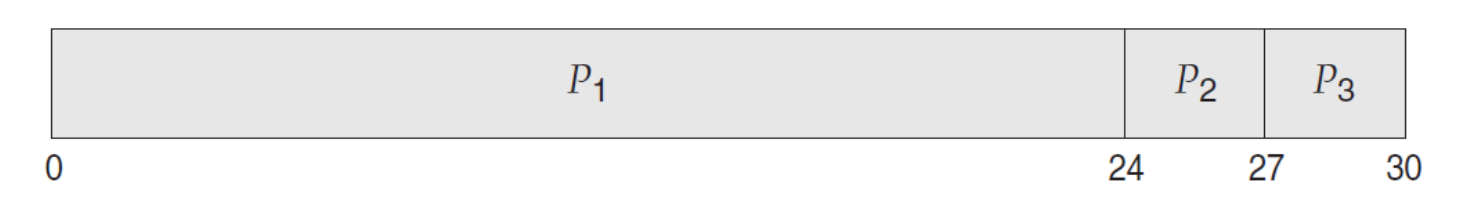
- Waiting Time
    - P1 : 0
    - P2 : 24
    - P3 : 27
    - Total Waiting Time : 0 + 24 + 27 = 51
    - Average Waiting Time : 51/3 = 17 
- Turnaround Time 
    - P1 : 24
    - P2 : 27
    - P3 : 30 
    - Total Turnaround Time : 24 + 27 + 30 = 81 
    - Average Turnaround Time : 81/3 = 27
    

#### case1) Arrive P2, P3, P3 at time = 0 
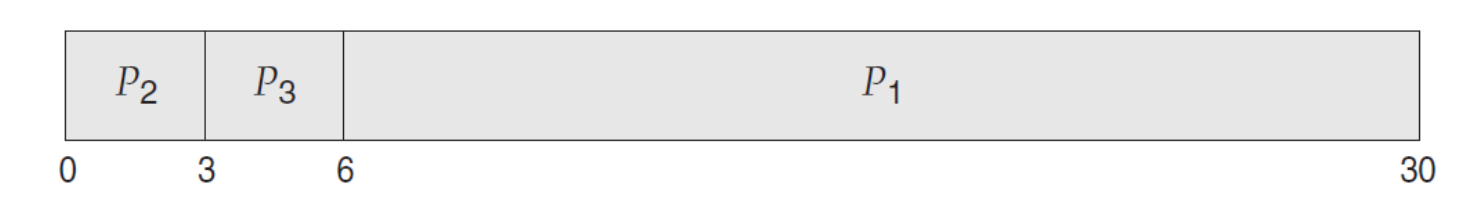
- Waiting Time
    - P2 : 0
    - P3 : 3
    - P1 : 6
    - Total Waiting Time : 6 + 0 + 3 = 9
    - Average Waiting Time : 9/3 = 3
- Turnaround Time 
    - P2 : 3
    - P3 : 6
    - P1 : 30
    - Total Turnaround Time : 3 + 6 + 30 = 39
    - Average Turnaround Time : 39/3 = 13

### FCFS alogorithm

- 위의 결과에서 보다 시피 평균 대기시간이 일반적으로 최적이 아니고, 프로세스의 CPU burst time 의 변동이 이 클수록 변동이 매우 심함 


- FCFS scheduling 은 nonpreemptive


- CPU-bound process 하나와 I/O-bound 프로세스가 여러개일 경우를 가정해보면, 
    - CPU-bound process 가 cpu 를 점유하면, I/O-bound 프로세스들은 ready queue에서 대기 해야 되고, 이때 I/O device 는 idle 상태 
    - 반대로 I/O-bound 프로세스들이 CPU 를 점유하면, 매우 빨리 실행되고 이때는 CPU 가 idle 상태  
    

- __Convoy Effect__
    - 위의 상황에서 Convey Effect 발생 
    - Convoy Effect 란 하나의 CPU-bound 가 오랜시간 cpu를 점유하여 다른 프로세스들이 대기하는 할때, CPU, device 사용률이 떨어지는 것을 뜻
    
----------
- the average waiting time under an FCFS policy is generally not minimal and may vary substantially if the processes’ CPU burst times vary greatly
    
    
- FCFS scheduling algorithm is nonpreemptive


- consider the performance of FCFS scheduling in a dynamic situation
    - Assume we have one CPU-bound process and many I/O-bound pro-cesses 

- __Convoy Effect__
    - all the other processes wait for the one big process to get off the CPU. This effect results in lower CPU and device utilization than might be possible if the shorter processes were allowed to go first.

# SJF: Shortest Job First  
    
- Shortest-Job-First
    - more precisely : __shortest-next-CPU-burst-first scheduling__


- This algorithm associates with each process the length of the process’s next CPU burst

- When the CPU is available, it is assigned to the process that has the smallest next CPU burst

- If the next CPU bursts of two processes are the same, FCFS scheduling is used to break the tie

### SJF: Shortest Job First Example
- P1 : Burst Time 6
- P2 : Burst Time 8
- P3 : Burst Time 7
- P4 : Burst Time 3

#### case) Arrive P1, P2, P3, P4 at time = 0 
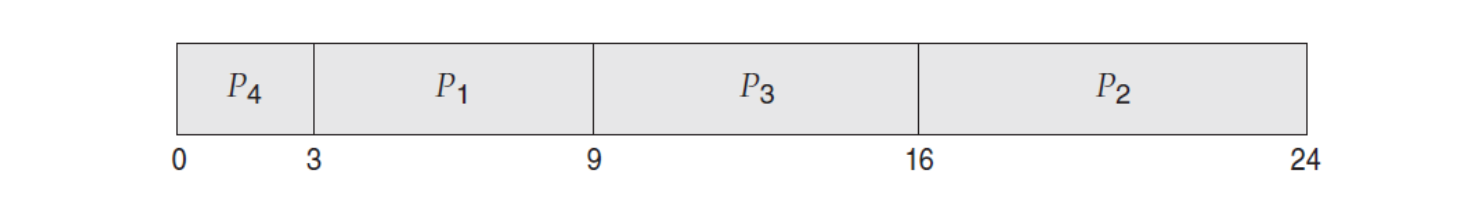
- Order : P4 -> P1 -> P3 -> P2
- Waiting Time
    - P4 : 0
    - P1 : 3
    - P3 : 9
    - P2 : 16
    - Total Waiting Time : 3 + 16 + 9 + 0 = 28
    - Average Waiting Time : 28/4 = 7
- Turnaround Time 
    - P4 : 3
    - P1 : 9
    - P3 : 16
    - P2 : 24
    - Total Turnaround Time : 9 + 24 + 16 + 3 = 52
    - Average Turnaround Time : 52/5 = 13
    

### SJF Algorithm

- SJF 알고리즘의 경우 최소 대기 시간을 준다는 점에서 최적일 수도 있다.
- 실제로 구현되기는 어렵다 -> 다음 CPU Burst Time 은 실행되기 전까지는 알 수 없다.
- 대신 다음 CPU Busrt Time 을 exponential average 를 통해 예측 할수는 있다.

-------
- The SJF scheduling algorithm is provably optimal, in that it gives the mini- mum average waiting time for a given set of processes. Moving a short process before a long one decreases the waiting time of the short process more than it increases the waiting time of the long process. Consequently, the average waiting time decreases.


- Although the SJF algorithm is optimal, it cannot be implemented at the level of CPU scheduling, as there is no way to know the length of the next CPU burst


- One approach to this problem is to try to approximate SJF scheduling. We may not know the length of the next CPU burst, but we may be able to predict its value.


- The next CPU burst is generally predicted as an exponential average of the measured lengths of previous CPU bursts.


- Let tn be the length of the nth CPU burst, and let $\tau_{n+1}$ be our predicted value for the next CPU burst. Then, for α, $0 ≤ \alpha ≤ 1$, define

$$ \tau_{n+1} = \alpha t_{n} + (1-\alpha)\tau_{n} $$

- Figure 5.4 shows an exponential average with α = 1/2 and τ0 = 10.
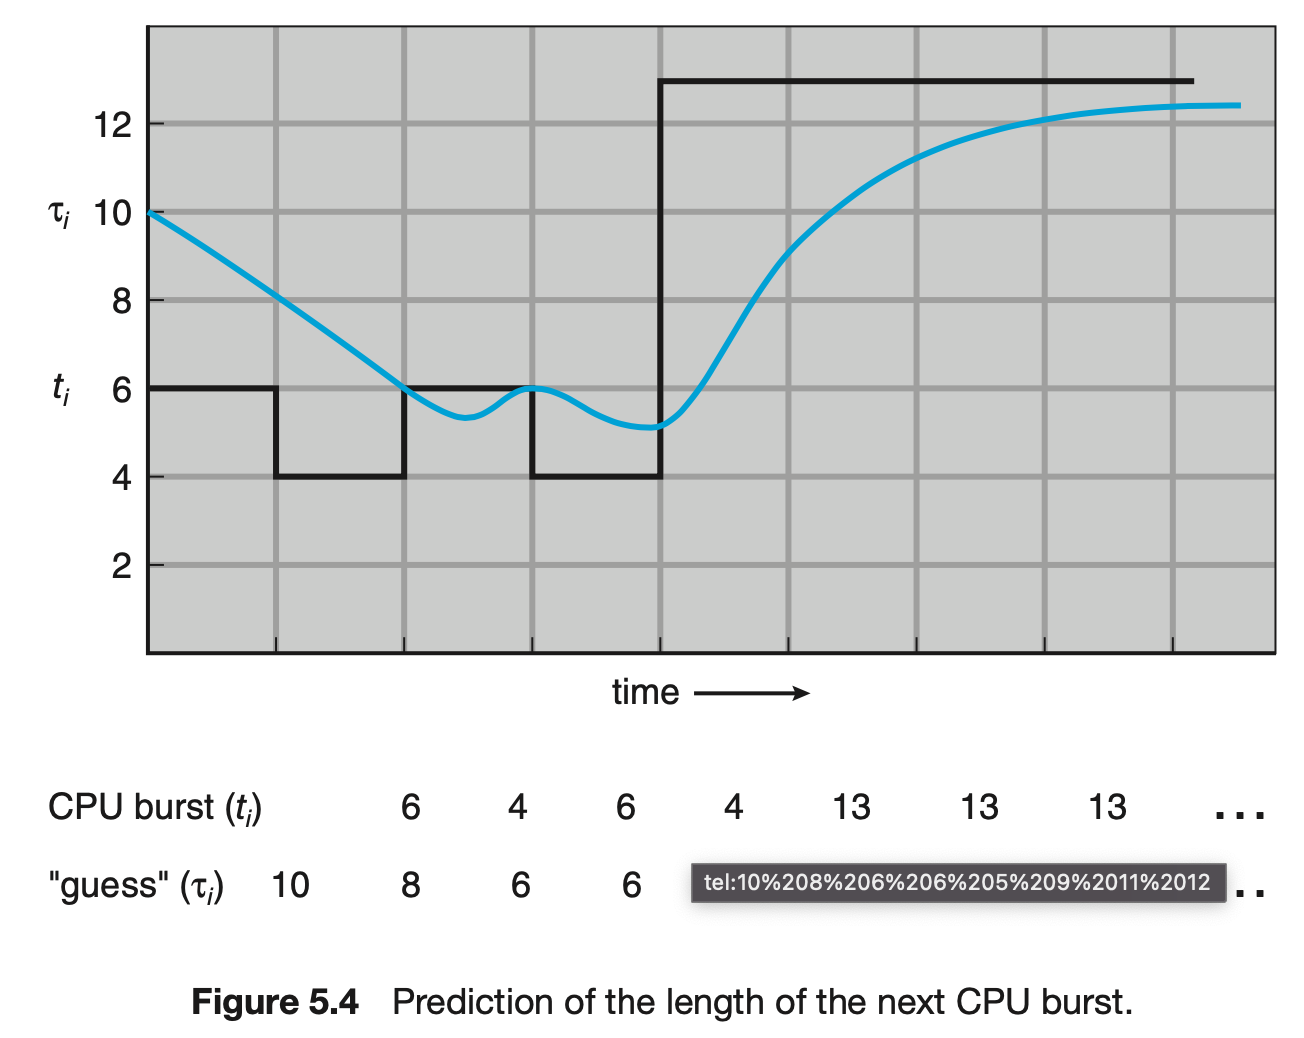

- To understand the behavior of the exponential average, we can expand the formula for τn+1 by substituting for τn to find
$$ \tau_{n+1} = \alpha t_{n} + (1-\alpha)\alpha t_{n-1} + \cdot\cdot\cdot + (1-\alpha)^{j}\alpha t_{n-j} + \cdot\cdot\cdot + (1-\alpha)^{n+1}\tau_{0}$$

# SRTF: Shortest Remaining Time First
    
- preemptive version of SJF algorithm 

### SRTF: Shortest Remaining Time First Example
- P1 : Arrival Time 0, Burst Time 8
- P2 : Arrival Time 1, Burst Time 4
- P3 : Arrival Time 2, Burst Time 9
- P4 : Arrival Time 3, Burst Time 5

#### case) Arrive P1, P2, P3, P4 
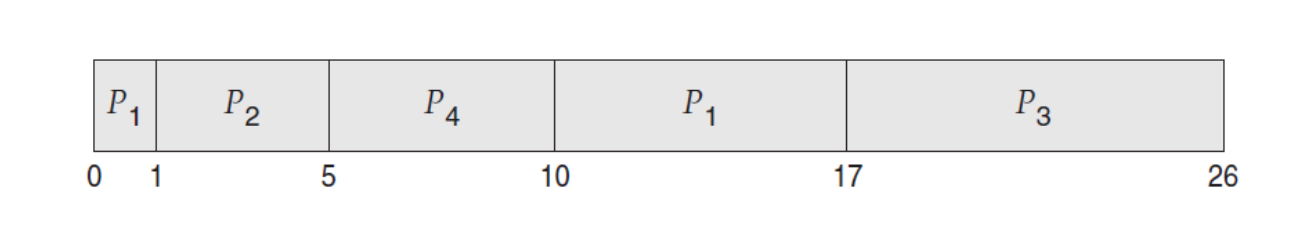


- Order Checking
    - burst_time_left_lst = []
    - At time t = 0, P1-arrival
        - Start P1
    - At time t = 1, P2-arrival
        - burst_time_left_lst = [7,4]
        - Start P2
    - At time t = 2, P3-arrival 
        - burst_time_left_lst = [7,3,9]
        - Start P2
    - At time t = 3, P4-arrival 
        - burst_time_left_lst = [7,2,9,5]
        - Start P2
    - At time t = 5
        - Finish P2
        - burst_time_left_lst = [7,0,9,5]
        - Start P4
    - At time t = 10
        - Finish P4
        - burst_time_left_lst = [7,0,9,0]
        - Start P1
    - At time t = 17
        - Finish P1
        - burst_time_left_lst = [0,0,9,0]
        - Start P3
    - At time t = 26
        - Finish P3
        - burst_time_left_lst = [0,0,0,0]


- Waiting Time
    - P1 : 10 - 1 (context switch)
    - P2 : 1 - 1 (arrival time)
    - P3 : 17 - 2 (arrival time)
    - P4 : 5 - 3 (arrival time)
    - Total Waiting Time : 9 + 0 + 15 + 2 = 26
    - Average Waiting Time : 26/4 = 6.5
    
    
- Turnaround Time : completion time - arrival time 
    - P1 : 17 - 0 (arrival time)
    - P2 : 5 - 1 (arrival time)
    - P3 : 26 - 2 (arrival time)
    - P4 : 16 - 3 (arrival time)
    - Total Turnaround Time : 17 + 4 + 24 + 13 = 58
    - Average Turnaround Time : 58/4 = 14.5

# RR: Round-Robin

- preemptive FCFS with a time quantum 


- A time quantum (or time slice) is a small unit of time
    - generally from 10 to 100 milliseconds in length
    
    
- The ready queue is treated as a <font color='red'>circular queue</font>.


- The scheduler goes around the ready queue,
    - allocating the CPU to each process
    - for a time interval of up to 1 time quantum.

### One of two things will then happen

#### a. The process may have a CPU burst of less than 1 time quantum
    - the process itself will release the CPU voluntarily. The scheduler will then proceed to the next process in the ready queue.
    
#### b. If the CPU burst of the currently running process is longer than 1 time quantum
    - the timer will go off and will cause an interrupt to the operating system. A context switch will be executed, and the process will be put at the tail of the ready queue.

- The average waiting time under the RR policy is often long

### RR: Round-Robin Example
- P1 : Burst Time 24
- P2 : Burst Time 3
- P3 : Burst Time 3
- time quantum  = 4

#### case) Arrive P1, P2, P3 at time 0
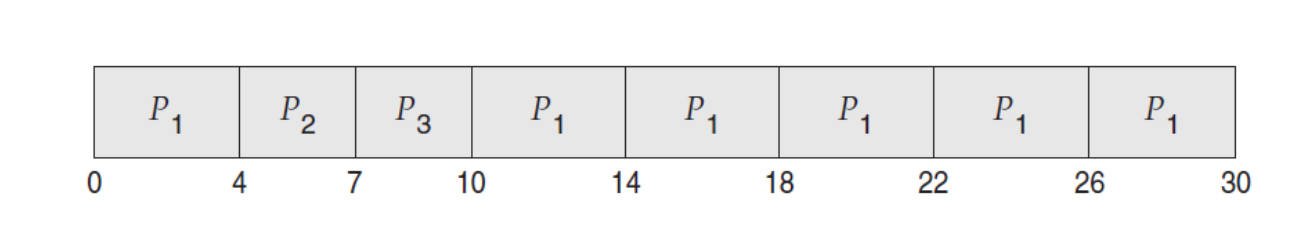

- Order Checking
    - circular_queue = [p1(24), p2(3), p3(3)]
    - 1st quantum (0 ~ 4)
        - Start P1
        - Move P1 to circular queue
        - circular_queue = [p2(3), p3(3), p1(20)]
    - 2nd qunatum (0 ~ 7)
        - Start P2
        - Terminate P2 at time 7
        - circular_queue = [p3(3), p1(20)]
    - 3rd quantum (7 ~ 10)
        - Start P3
        - Terminate P3 at time 10
        - circular_queue = [p1(20)]
    - 4th quantum (10 ~ 14)
        - Start P1
        - Move P1 to circular queue
        - circular_queue = [p1(16)]
    - 5th quantum (14 ~ 18)
        - Start P1
        - Move P1 to circular queue
        - circular_queue = [p1(12)]
    - 6th quantum (18 ~ 22)
        - Start P1
        - Move P1 to circular queue
        - circular_queue = [p1(8)]
    - 7th quantum (22 ~ 26)
        - Start P1
        - Move P1 to circular queue
        - circular_queue = [p1(4)]
    - 8th quantum (26 ~ 30)
        - Start P1
        - Terminate P3 at time 30

- Waiting Time
    - P1 : 10 - 4 
    - P2 : 4 (arrival time)
    - P3 : 7
    - Total Waiting Time : 6 + 4 + 7 = 17
    - Average Waiting Time :17/3 = 5.66
    
- Turnaround Time 
    - P1 : 30
    - P2 : 7
    - P3 : 10 
    - Total Turnaround Time : 30 + 7 + 10 = 47
    - Average Turnaround Time : 47/3 = 15.66

### The performance of the RR algorithm depends heavily on __the size of the time quantum__

- At one extreme, if the time quantum is extremely large, the RR policy is the same as the __FCFS policy__
- In contrast, if the time quantum is extremely small (say, 1 millisecond), the RR approach can result in __a large number of context switches__
    
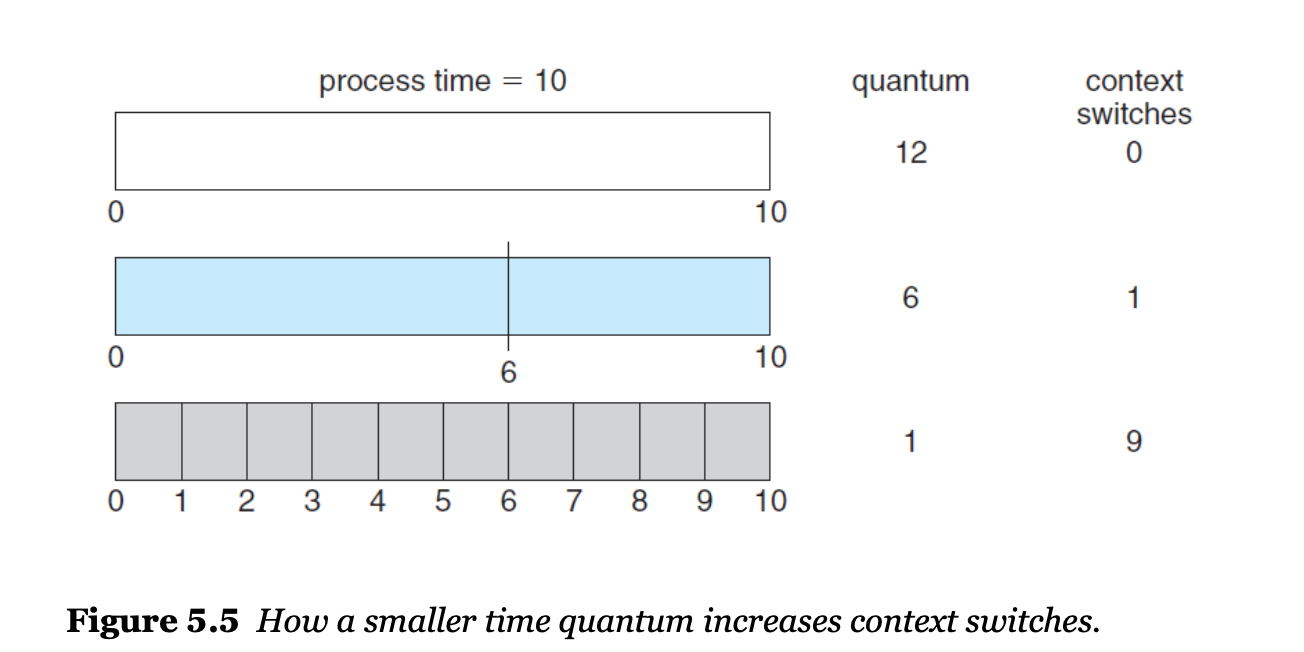

- we want the __time quantum to be large__ with respect to the __context- switch time__. If the context-switch time is approximately 10 percent of the time quantum, then about 10 percent of the CPU time will be spent in context switching.
- the context-switch time is a small fraction of the time quantum.

### __Turnaround time__ also depends on the size of the time quantum. 
- the average turnaround time of a set of processes does not necessarily improve as the time-quantum size increases. 
- In general, the average turnaround time can be improved if most processes finish their next CPU burst in a single time quantum. 
- For example, given three processes of 10 time units each and a quantum of 1 time unit, the average turnaround time is 29. If the time quantum is 10, however, the average turnaround time drops to 20. 
- If context-switch time is added in, the average turnaround time increases even more for a smaller time quantum, since more context switches are required.

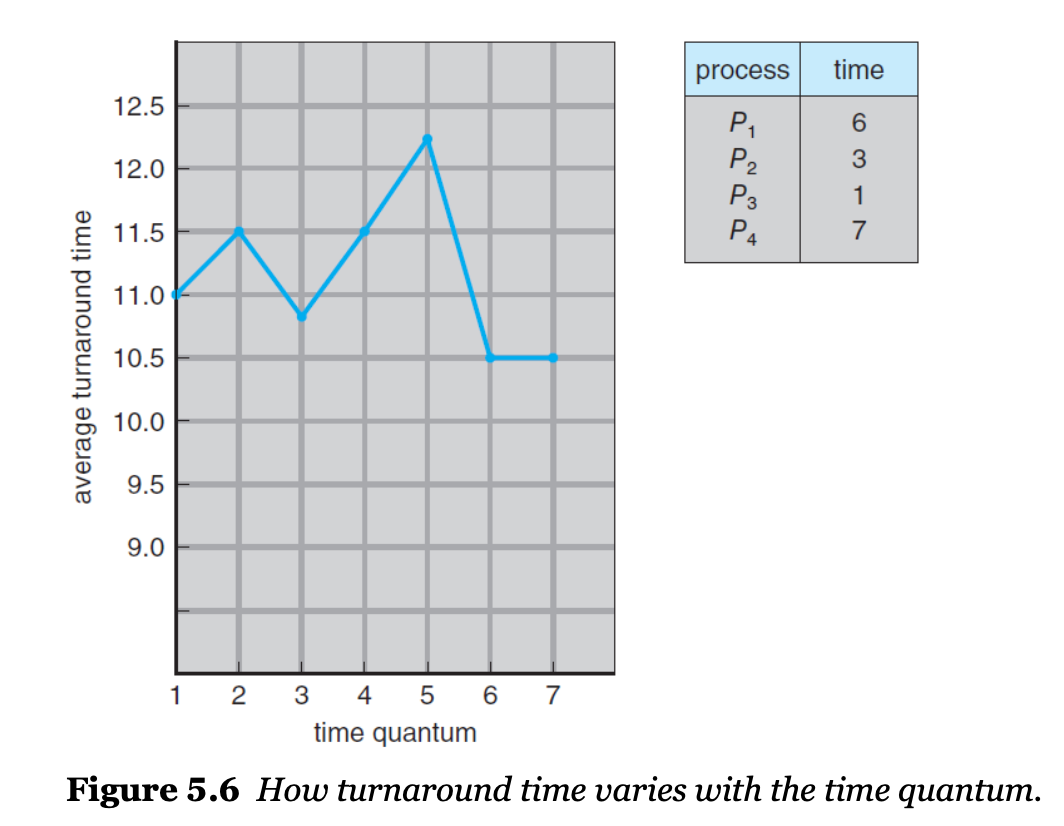

# Priority-based

- A priority is associated with each process,
    - CPU is allocated to the process with the highest priority.
    - Processes with equal priority are scheduled in FCFS order.
    
    
- The SJF algorithm is a special case of the general priority-scheduling algorithm
    - <font color='red'>SJF Algorithm</font> is simply a priority algorithm where the priority (p) is the inverse of the (predicted) next CPU burst
    
    
- There is no general agreement on whether 0 is the highest or lowest priority. Some systems use low numbers to represent low priority
- In this text, we assume that low numbers represent high priority.

### Priority-based Example
- P1 : Burst Time 10 / Priority 3
- P2 : Burst Time 1 / Priority 1
- P3 : Burst Time 2 / Priority 4
- P4 : Burst Time 1 / Priority 5
- P5 : Burst Time 5 / Priority 2

#### case) Arrive P1, P2, P3, P4, P5 at time 0
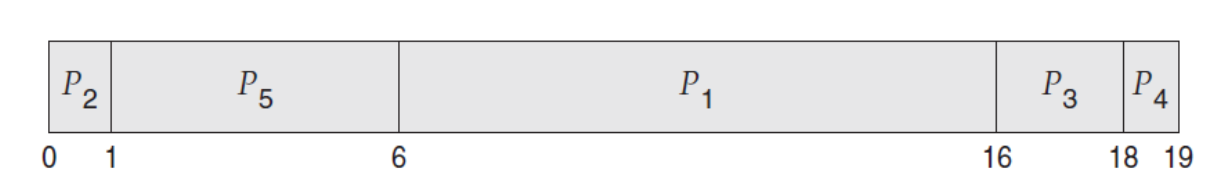

- Order Checking
    - By priority
    - p2 -> p5 -> p1 -> p3 -? p4

- Waiting Time
    - P1 : 6
    - P2 : 0
    - P3 : 16
    - P4 : 18
    - P5 : 1
    - Total Waiting Time : 6 + 0 + 16 + 18 + 1 = 41
    - Average Waiting Time :41/5 = 8.2
    
- Turnaround Time 
    - P1 : 16 - 0
    - P2 : 1 - 0
    - P3 : 18 - 0
    - P4 : 19 - 0
    - P5 : 6 - 0
    - Total Turnaround Time : 16 + 1 + 18 + 19 + 6 = 60
    - Average Turnaround Time : 60/5 = 12

#### Priorities can be defined either internally or externally. 
- __Internally defined priorities__ use some measurable quantity or quantities to compute the priority of a process. For example, time limits, memory requirements, the number of open files, and the ratio of average I/O burst to average CPU burst have been used in computing priorities. 
- __External priorities__ are set by criteria outside the operating system, such as the importance of the process, the type and amount of funds being paid for computer use, the department sponsoring the work, and other, often political, factors.


####  Priority scheduling can be either preemptive or nonpreemptive. 
- When a process arrives at the ready queue, its priority is compared with the priority of the currently running process. 
- __A preemptive priority scheduling algorithm__ will preempt the CPU if the priority of the newly arrived process is higher than the priority of the currently running process. 
    - <font color='red'>SJF Algorithm</font>
- __A nonpreemptive priority scheduling algorithm__ will simply put the new process at the head of the ready queue.
    - <font color='red'>SRTF Algorithm</font>
   
   
####  A major problem with priority scheduling algorithms is <font color='red'>indefinit blocking, or starvation</font>
- A process that is ready to run but waiting for the CPU can be considered blocked. 
- A priority scheduling algorithm can leave some low- priority processes waiting indefinitely. 
- In a heavily loaded computer system, a steady stream of higher-priority processes can prevent a low-priority process from ever getting the CPU.


####  A solution to the problem of indefinite blockage of low-priority processes is <font color='red'>aging</font>
- __Aging__ involves gradually increasing the priority of processes that wait in the system for a long time. 
- For example, if priorities range from 127 (low) to 0 (high), we could periodically (say, every second) increase the priority of a waiting process by 1. 

###   combine round-robin and priority scheduling 
- system executes the highest-priority process 
- runs processes with the same priority using round-robin scheduling

### Priority-based with RR Example
- P1 : Burst Time 4 / Priority 3
- P2 : Burst Time 5 / Priority 2
- P3 : Burst Time 8 / Priority 2
- P4 : Burst Time 7 / Priority 1
- P5 : Burst Time 3 / Priority 3
- time quantum : 2

#### case) Arrive P1, P2, P3, P4, P5 at time 0
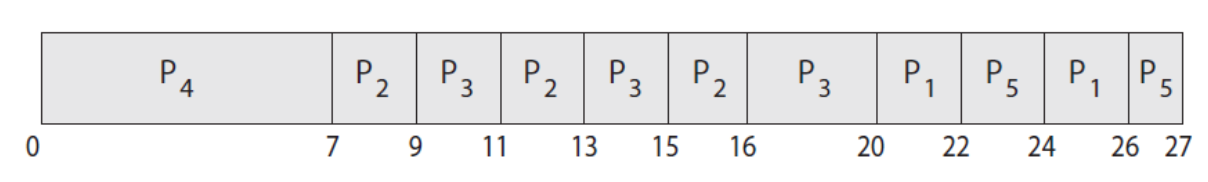

- Order Checking
    - By priority
    - p4 -> RR(p2, p3) -> RR(p1, p5)
    - process P4 has the highest priority, so it will run to completion
    - processes P2 and P3 have the next-highest priority, and they will execute in a round-robin fashion. Notice that when process P2 finishes at time 16, process P3 is the highest-priority process, so it will run until it completes execution. 
    - processes P1 and P5 remain, and as they have equal priority, they will execute in round-robin order until they complete.
    
- Waiting Time
    - P1 : 20 + 2 
    - P2 : 7 + 2 + 2 
    - P3 : 9 + 2 + 1
    - P4 : 0
    - P5 : 22 + 2
    - Total Waiting Time : 22 + 11 + 12 + 0 + 24 = 69
    - Average Waiting Time : 69/5 = 13.8
    
- Turnaround Time 
    - P1 : 26 - 0
    - P2 : 16 - 0
    - P3 : 20 - 0
    - P4 : 7 - 0
    - P5 : 27 - 0
    - Total Turnaround Time : 26 + 16 + 20 + 7 + 27 = 96
    - Average Turnaround Time : 96/5 = 19.2

# Multilevel Queue Scheduling

- priority w/ round-robin scheduling -> single queue
- O(n) search may be necessary to determine the highest-priority process 
- __multilevel queue__ : separate queues for each distinct priority, and priority scheduling simply schedules the process in the highest-priority queue. 
    - if there are multiple processes in the highest-priority queue, they are executed in round-robin order. 
    - In the most generalized form of this approach, a priority is assigned statically to each process, and a process remains in the same queue for the duration of its runtime.
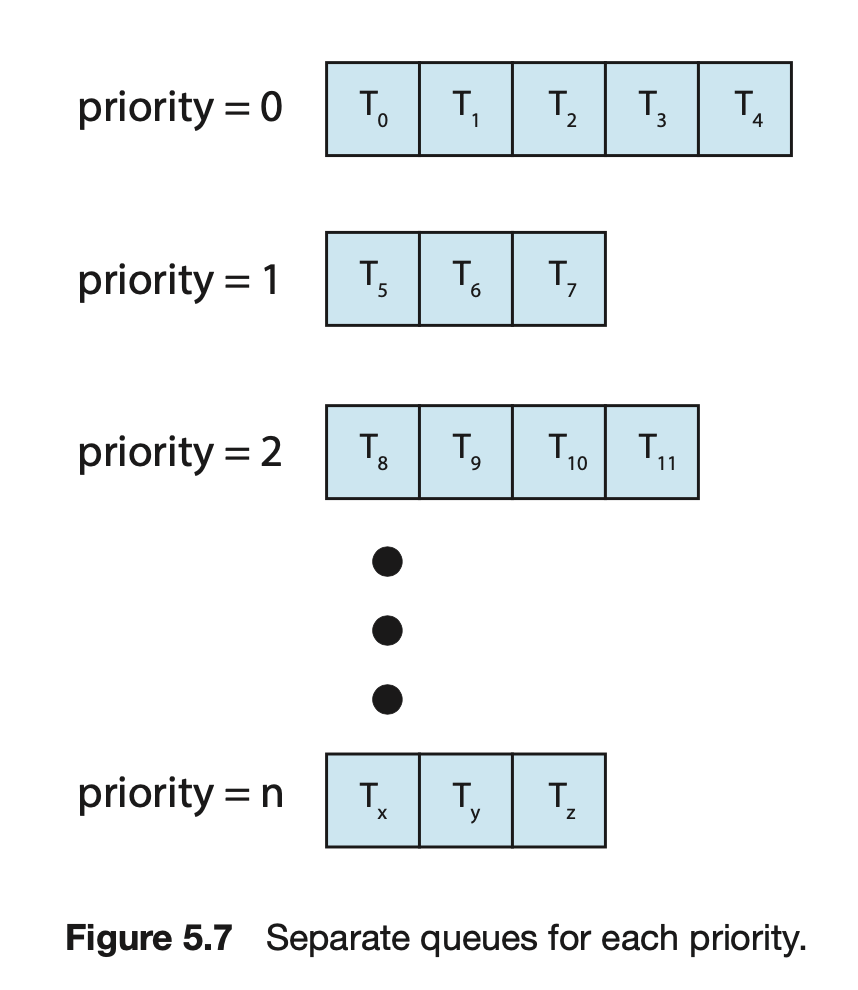

#### A multilevel queue scheduling algorithm can also be used to partition processes into several separate queues based on the process type (Figure 5.8). 
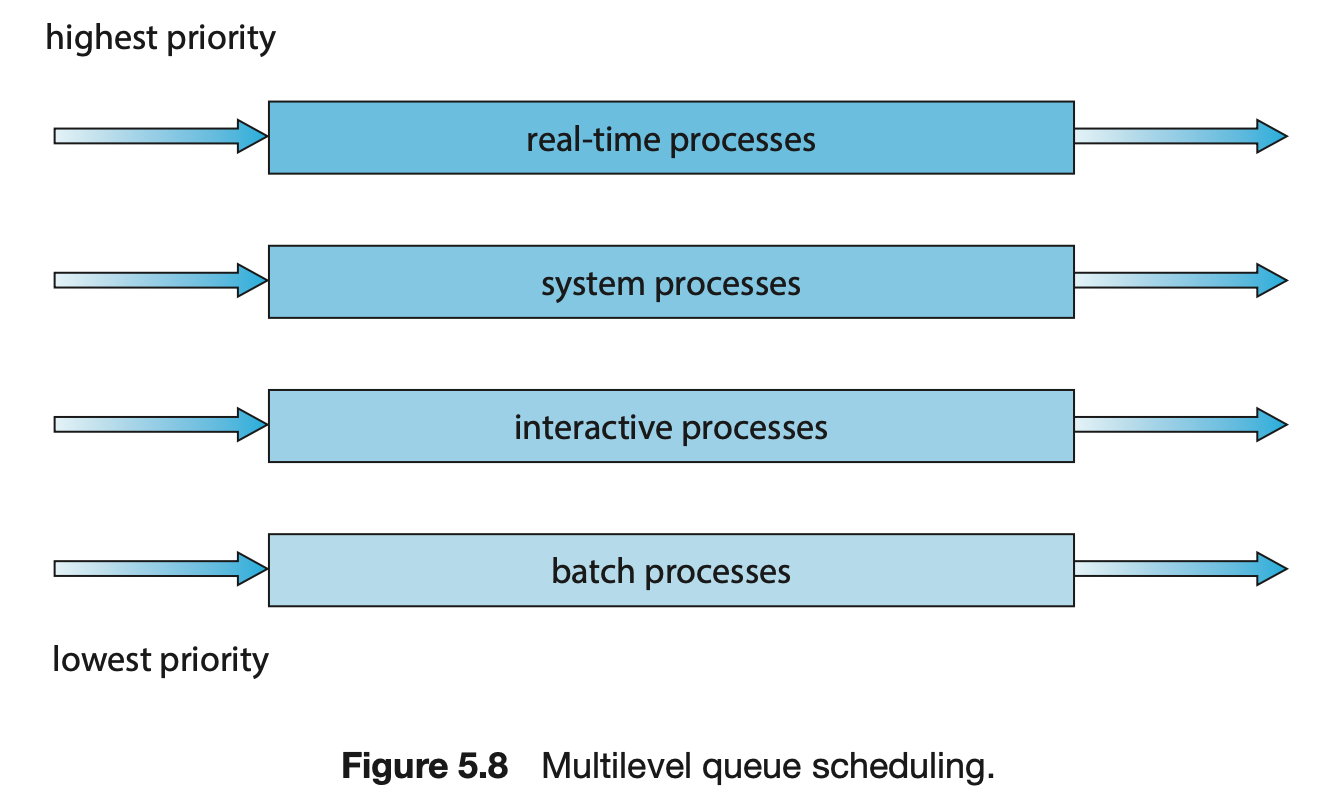
- Separate queues might be used for foreground and background processes, and each queue might have its own scheduling algorithm. 
    - The foreground queue might be scheduled by an RR algorithm, for example, while the background queue is scheduled by an FCFS algorithm.

#### Let’s look at an example of a multilevel queue scheduling algorithm with four queues, listed below in order of priority

1. Real-time processes
2. System processes
3. Interactive processes
4. Batch processes

- If an interactive process entered the ready queue while a batch process was running, the batch process would be preempted


- Another possibility is to time-slice among the queues. Here, each queue gets a certain portion of the CPU time, which it can then schedule among its various processes
    - the foreground queue can be given 80 percent of the CPU time for RR scheduling among its processes, while the background queue receives 20 percent of the CPU to give to its processes on an FCFS basis.

# MLFQ: Multi-Level Feedback Queue

- __multilevel feedback__ queue scheduling algorithm allows __a process to move between queues__.


- The idea is to separate processes according to the characteristics of their __CPU bursts__


- Case1) _If a process uses too much CPU time_, 
    - it will be moved to a lower-priority queue. This scheme leaves I/O-bound and interactive processes—which are typically characterized by short CPU bursts in the higher-priority queues. 


- Case2) _a process that waits too long in a lower-priority queue_
    - may be moved to a higher-priority queue. This form of aging prevents starvation.

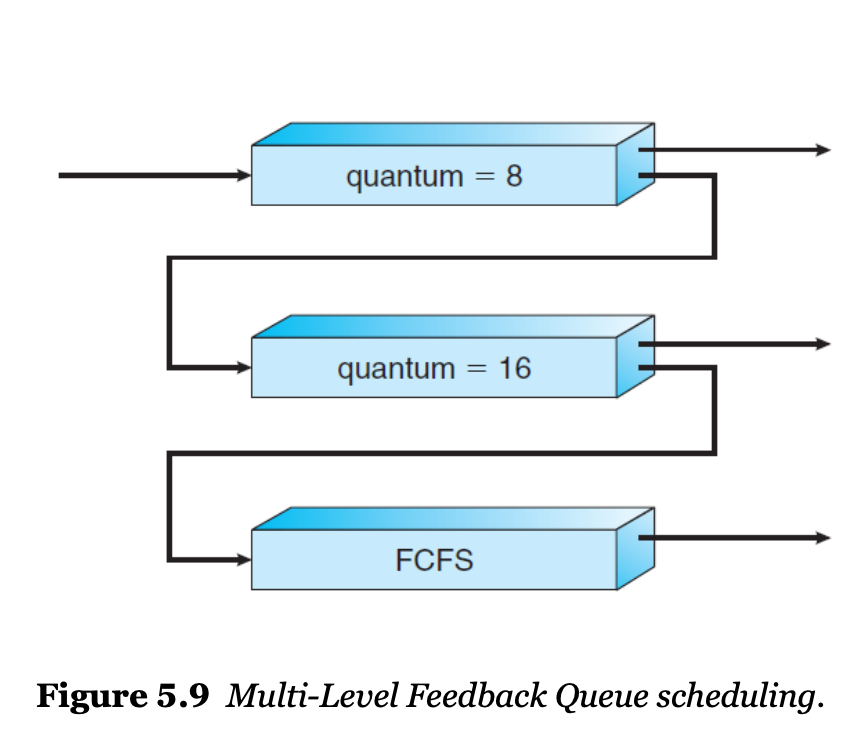

#### a multilevel feedback queue scheduler with three queues, numbered from 0 to 2 (Figure 5.9).
    step1 The scheduler first executes all processes in queue 0. 
    step2 Only when queue 0 is empty will it execute processes in queue 1. 
    step3 processes in queue 2 will be executed only if queues 0 and 1 are empty. 
    step4 A process that arrives for queue 1 will preempt a process in queue 2. 
    step5 A process in queue 1 will in turn be preempted by a process arriving for queue 0.

    step1 An entering process is put in queue 0. A process in queue 0 is given a time quantum of 8 milliseconds. 
    step2 If it does not finish within this time, it is moved to the tail of queue 1. 
    step3 If queue 0 is empty, the process at the head of queue 1 is given a quantum of 16 milliseconds. 
    step4 If it does not complete, it is preempted and is put into queue 2. 
    step5 Processes in queue 2 are run on an FCFS basis but are run only when queues 0 and 1 are empty. 
    
    - To prevent starvation, a process that waits too long in a lower-priority queue may gradually be moved to a higher-priority queue.

#### In general, a multilevel feedback queue scheduler is defined by the following parameters:
    - The number of queues
    - The scheduling algorithm for each queue
    - The method used to determine when to upgrade a process to a higher- priority queue
    - The method used to determine when to demote a process to a lower- priority queue
    - The method used to determine which queue a process will enter when that process needs service

#### The definition of a multilevel feedback queue scheduler makes it the most general CPU-scheduling algorithm

# 5.4 Thread Scheduling

#### On most modern operating systems
- Kernel threads – not processes – that are being scheduled, 
- User-level threads are managed by a thread library
- User-level threads must ultmately be mapped to an associated kernel-level thread, although this mapping may be indirect and may use a lightweight process

# 5.6 Real-Time CPU Scheduling

#### Scheduling in the Real-Time Operating System

- __Soft real-time__
    - provide no guarantee as to when a critical real-time process will be scheduled
    - They guarantee only that the process will be given preference over noncritical processes.
    
- __Hard real-time systems__
    - have stricter requirements.
    - A task must be services by its deadline.